# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Import Dataset

In [2]:
df = pd.read_csv('dataset/Default Dataset RUL to Capacity.csv')

# Checking Dataset

In [3]:
df

,RUL,Capacity
0,1994.209465,93.209024
1,1989.000745,92.288214
2,1980.354460,91.597606
3,1976.869283,90.676796
4,1959.629086,90.561694
...,...,...
266,139.900320,15.285451
267,136.491322,16.206262
268,126.188150,17.127072
269,114.118584,17.011971


<Axes: xlabel='Capacity', ylabel='RUL'>

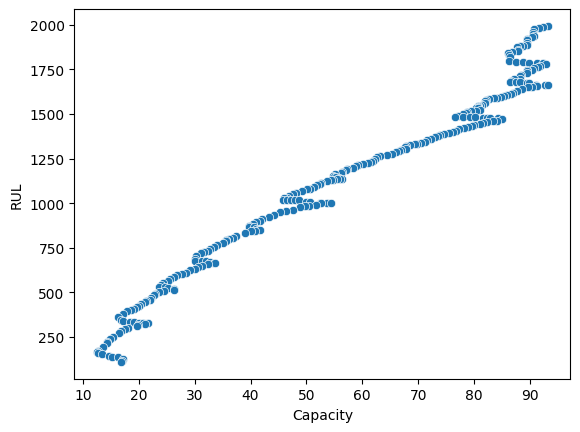

In [4]:
sns.scatterplot(x=df['Capacity'], y=df['RUL'])

# Split Feature and Target

In [5]:
X = df[['Capacity']] #Feature
y = df['RUL'] #Target

#Check Correlation

In [6]:
cor, _ = pearsonr(df['Capacity'].values, df['RUL'].values)

print("Correlation between feature and target:", cor)

Correlation between feature and target: 0.9859704468789166


# Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [8]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [9]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
y_pred = model_rf.predict(X_test)

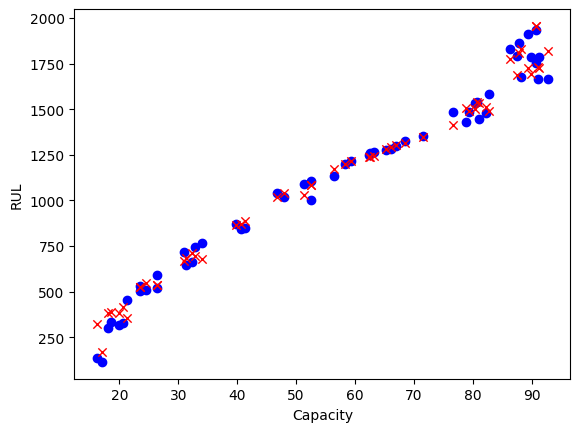

In [11]:
plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test, y_pred, color='red', marker='x', linewidths=1)
plt.xlabel('Capacity')
plt.ylabel('RUL')
plt.show()

# Model Evaluation

In [13]:
accuracy = model_rf.score(X_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9793034097053277


In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 54.358974594921165
Mean Squared Error: 5367.89138622085
Root Mean Squared Error: 73.26589510966784
R-squared: 0.9793034097053277
